In [103]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import h5py
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [19]:
pip install numpy xarray matplotlib cartopy netCDF4

1399.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


## 1.1 Check out .nc4 file 

In [20]:
file_path = "/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2007season1_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4AL_MULTISAT_SST-NGT_MA_750M.nc4"

In [21]:
# 打开 .nc4 文件
ds = xr.open_dataset(file_path)

# 查看文件的元数据（变量、维度等）
print("Dataset Info:")
print(ds)

Dataset Info:
<xarray.Dataset> Size: 22MB
Dimensions:      (x: 940, y: 970, time: 1, n_vals: 2, level: 1)
Coordinates:
  * x            (x) float64 8kB -8.624e+06 -8.623e+06 ... -7.658e+06 -7.657e+06
  * y            (y) float64 8kB 5.143e+06 5.142e+06 ... 4.146e+06 4.145e+06
    lat          (y, x) float64 7MB ...
    lon          (y, x) float64 7MB ...
  * time         (time) datetime64[ns] 8B 2007-02-14T14:00:00
  * level        (level) float64 8B 0.0
Dimensions without coordinates: n_vals
Data variables:
    coord_ref    int32 4B ...
    time_bounds  (time, n_vals) datetime64[ns] 16B ...
    sst          (time, level, y, x) float64 7MB ...
Attributes: (12/21)
    cw:polygon_longitude:           [-77.47356397 -75.30150498 -73.129446   -...
    source:                         METOPA_AVHRR
    institution:                    NOAA/NESDIS/STAR
    history:                        [2022-10-07 16:04:06 UTC cwutils-3.7.1.12...
    dcs:createInstitution:          NOAA/NESDIS/STAR
    dcs:cre

In [22]:
print("\nVariables in the file:")
print(ds.variables)


Variables in the file:
Frozen({'coord_ref': <xarray.Variable ()> Size: 4B
[1 values with dtype=int32]
Attributes:
    longitude_of_prime_meridian:     0.0
    longitude_of_projection_origin:  0.0
    standard_parallel:               0.0
    false_easting:                   0.0
    false_northing:                  0.0
    semi_major_axis:                 6378137.0
    inverse_flattening:              298.257223653
    grid_mapping_name:               mercator, 'x': <xarray.IndexVariable 'x' (x: 940)> Size: 8kB
array([-8624317.690714, -8623287.690714, -8622257.690714, ..., -7659207.690714,
       -7658177.690714, -7657147.690714])
Attributes:
    standard_name:  projection_x_coordinate
    units:          m, 'y': <xarray.IndexVariable 'y' (y: 970)> Size: 8kB
array([5143224.209891, 5142194.209891, 5141164.209891, ..., 4147214.209891,
       4146184.209891, 4145154.209891])
Attributes:
    standard_name:  projection_y_coordinate
    units:          m, 'lat': <xarray.Variable (y: 970, x: 9

In [40]:
# 查看 sst 变量的详细信息
print(ds["sst"])

<xarray.DataArray 'sst' (time: 1, level: 1, y: 970, x: 940)> Size: 7MB
[911800 values with dtype=float64]
Coordinates:
  * x        (x) float64 8kB -8.624e+06 -8.623e+06 ... -7.658e+06 -7.657e+06
  * y        (y) float64 8kB 5.143e+06 5.142e+06 ... 4.146e+06 4.145e+06
    lat      (y, x) float64 7MB ...
    lon      (y, x) float64 7MB ...
  * time     (time) datetime64[ns] 8B 2007-02-14T14:00:00
  * level    (level) float64 8B 0.0
Attributes:
    long_name:     sea_surface_subskin_temperature
    units:         celsius
    cell_methods:  area: mean
    grid_mapping:  coord_ref


In [41]:
print(ds["sst"].isnull().any())

RuntimeError: NetCDF: HDF error

## 1.2 计算季节平均值

In [23]:
data_folder = "/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files"

In [89]:
# obtain the data from 2007-2003 and 2024
files = [os.path.join(data_folder, f) for f in os.listdir(data_folder)]
files_2023 = [f for f in files if "2023" in f]
baseline_files = list(set(files) - set(files_2023))

# 输出结果
print("Baseline files (2007-2022):")
print(baseline_files)

Baseline files (2007-2022):
['/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2011season2_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4', '/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2017season4_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4', '/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2020season2_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4', '/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2022season1_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4', '/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2007season4_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4', '/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2013season1_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4', '/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2013season2_SEASONAL_MULTISAT_SST-NGT_MA_750M.nc4', '/Users/lijinpeng/Desktop/MDoyster/data/Climate/noaa_nc4_files/ACSPOCW_2018season2_SEASONAL_MULTISAT_SST-NGT_M

In [90]:
# 定义季节划分（基于月份）
seasons = {"Winter": [12, 1, 2], "Spring": [3, 4, 5], "Summer": [6, 7, 8], "Fall": [9, 10, 11]}

In [98]:
# 定义通用的处理函数
def process_files_with_h5py(file_list):
    seasonal_data = {season: [] for season in seasons.keys()}
    
    for file in file_list:
        try:
            with h5py.File(file, "r") as f:
                # 提取 SST 数据
                sst = f["sst"][:]
                
                # 替换填充值为 NaN
                fill_value = f["sst"].attrs.get("missing_value", None)
                if fill_value is not None:
                    sst = np.where(sst == fill_value, np.nan, sst)
                
                # 解码数据
                scale_factor = f["sst"].attrs.get("scale_factor", 1.0)
                add_offset = f["sst"].attrs.get("add_offset", 0.0)
                sst = sst * scale_factor + add_offset
                
                # 提取时间数据
                time = f["time"][:]
                
                # 转换时间为 datetime
                base_time = datetime(1970, 1, 1)  # 假设基准时间是 Unix 时间
                converted_time = [base_time + timedelta(seconds=int(t)) for t in time]
                
                # 获取月份（假设文件中只有一个时间点）
                month = pd.Timestamp(converted_time[0]).month
                
                # 判断季节并计算空间平均值
                for season, months in seasons.items():
                    if month in months:
                        mean_value = float(np.nanmean(sst))  # 空间平均值
                        seasonal_data[season].append(mean_value)
        except Exception as e:
            print(f"Skipping file {file} due to error: {e}")
            continue
    
    # 计算每个季节的平均值
    return {season: np.nanmean(values) if len(values) > 0 else np.nan for season, values in seasonal_data.items()}


In [99]:
# 处理 2007-2022 文件
baseline_seasonal_avg = process_files_with_h5py(baseline_files)
print("Baseline seasonal averages (2007-2022):")
print(baseline_seasonal_avg)

# 处理 2023 文件
seasonal_avg_2023 = process_files_with_h5py(files_2023)
print("\n2023 seasonal averages:")
print(seasonal_avg_2023)



Baseline seasonal averages (2007-2022):
{'Winter': np.float64(13.283282820548179), 'Spring': np.float64(18.3180053297519), 'Summer': np.float64(25.14712935991527), 'Fall': np.float64(19.408564031290673)}

2023 seasonal averages:
{'Winter': np.float64(14.377189544554234), 'Spring': np.float64(18.13525859665556), 'Summer': np.float64(25.57924873738788), 'Fall': np.float64(19.175713658155043)}


In [100]:
# 计算异常值
anomalies = {season: seasonal_avg_2023[season] - baseline_seasonal_avg[season] 
             for season in baseline_seasonal_avg.keys()}

# 打印异常值
print("\n2023 anomalies (compared to 2007-2022 baseline):")
for season, anomaly in anomalies.items():
    print(f"{season}: {anomaly:.2f} °C")



2023 anomalies (compared to 2007-2022 baseline):
Winter: 1.09 °C
Spring: -0.18 °C
Summer: 0.43 °C
Fall: -0.23 °C



## Test 解码规则

In [101]:
with h5py.File(file_path, "r") as f:
    # 提取 SST 数据
    sst = f["sst"][:]
    
    # 替换填充值为 NaN
    fill_value = f["sst"].attrs.get("missing_value", None)
    if fill_value is not None:
        sst = np.where(sst == fill_value, np.nan, sst)
    
    # 解码数据
    scale_factor = f["sst"].attrs.get("scale_factor", 1.0)
    add_offset = f["sst"].attrs.get("add_offset", 0.0)
    sst = sst * scale_factor + add_offset
    
    # 打印解码后数据的统计信息
    print(f"SST Min: {np.nanmin(sst):.2f}, SST Max: {np.nanmax(sst):.2f}, SST Mean: {np.nanmean(sst):.2f}")



SST Min: 4.10, SST Max: 26.70, SST Mean: 19.18


## Visualization Space distribution

In [107]:
def calculate_spatial_anomalies_per_season(file_list_2023, baseline_files):
    seasonal_anomalies = {}
    
    for season, months in seasons.items():
        # 读取 2023 对应季节的数据
        seasonal_2023 = []
        for file in file_list_2023:
            with h5py.File(file, "r") as f:
                # 提取 SST 和时间
                sst = f["sst"][:]
                time = f["time"][:]
                fill_value = f["sst"].attrs.get("missing_value", None)
                
                # 替换填充值
                if fill_value is not None:
                    sst = np.where(sst == fill_value, np.nan, sst)
                
                # 解码数据
                scale_factor = f["sst"].attrs.get("scale_factor", 1.0)
                add_offset = f["sst"].attrs.get("add_offset", 0.0)
                sst = sst * scale_factor + add_offset

                # 获取时间并判断是否属于当前季节
                base_time = datetime(1970, 1, 1)
                converted_time = [base_time + timedelta(seconds=int(t)) for t in time]
                month = pd.Timestamp(converted_time[0]).month
                if month in months:
                    seasonal_2023.append(sst)
        
        # 计算 2023 当前季节的平均值
        mean_2023 = np.nanmean(seasonal_2023, axis=0)
        
        # 计算基线（2007-2022）的平均值
        baseline_seasonal = []
        for file in baseline_files:
            with h5py.File(file, "r") as f:
                # 提取 SST
                sst = f["sst"][:]
                fill_value = f["sst"].attrs.get("missing_value", None)
                if fill_value is not None:
                    sst = np.where(sst == fill_value, np.nan, sst)
                
                # 解码数据
                scale_factor = f["sst"].attrs.get("scale_factor", 1.0)
                add_offset = f["sst"].attrs.get("add_offset", 0.0)
                sst = sst * scale_factor + add_offset
                
                # 获取时间并判断是否属于当前季节
                time = f["time"][:]
                converted_time = [base_time + timedelta(seconds=int(t)) for t in time]
                month = pd.Timestamp(converted_time[0]).month
                if month in months:
                    baseline_seasonal.append(sst)
        
        # 计算当前季节的基线平均值
        mean_baseline = np.nanmean(baseline_seasonal, axis=0)
        
        # 计算当前季节的空间异常值
        anomalies = mean_2023 - mean_baseline
        seasonal_anomalies[season] = anomalies
    
    return seasonal_anomalies


In [108]:
# 计算每个季节的空间异常值
seasonal_spatial_anomalies = calculate_spatial_anomalies_per_season(files_2023, baseline_files)


/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_36755/4060696595.py:31: RuntimeWarning: Mean of empty slice
  mean_2023 = np.nanmean(seasonal_2023, axis=0)
/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_36755/4060696595.py:56: RuntimeWarning: Mean of empty slice
  mean_baseline = np.nanmean(baseline_seasonal, axis=0)


/var/folders/sd/bq10trhj0z7_p4t5bg48p4780000gn/T/ipykernel_36755/3730338494.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


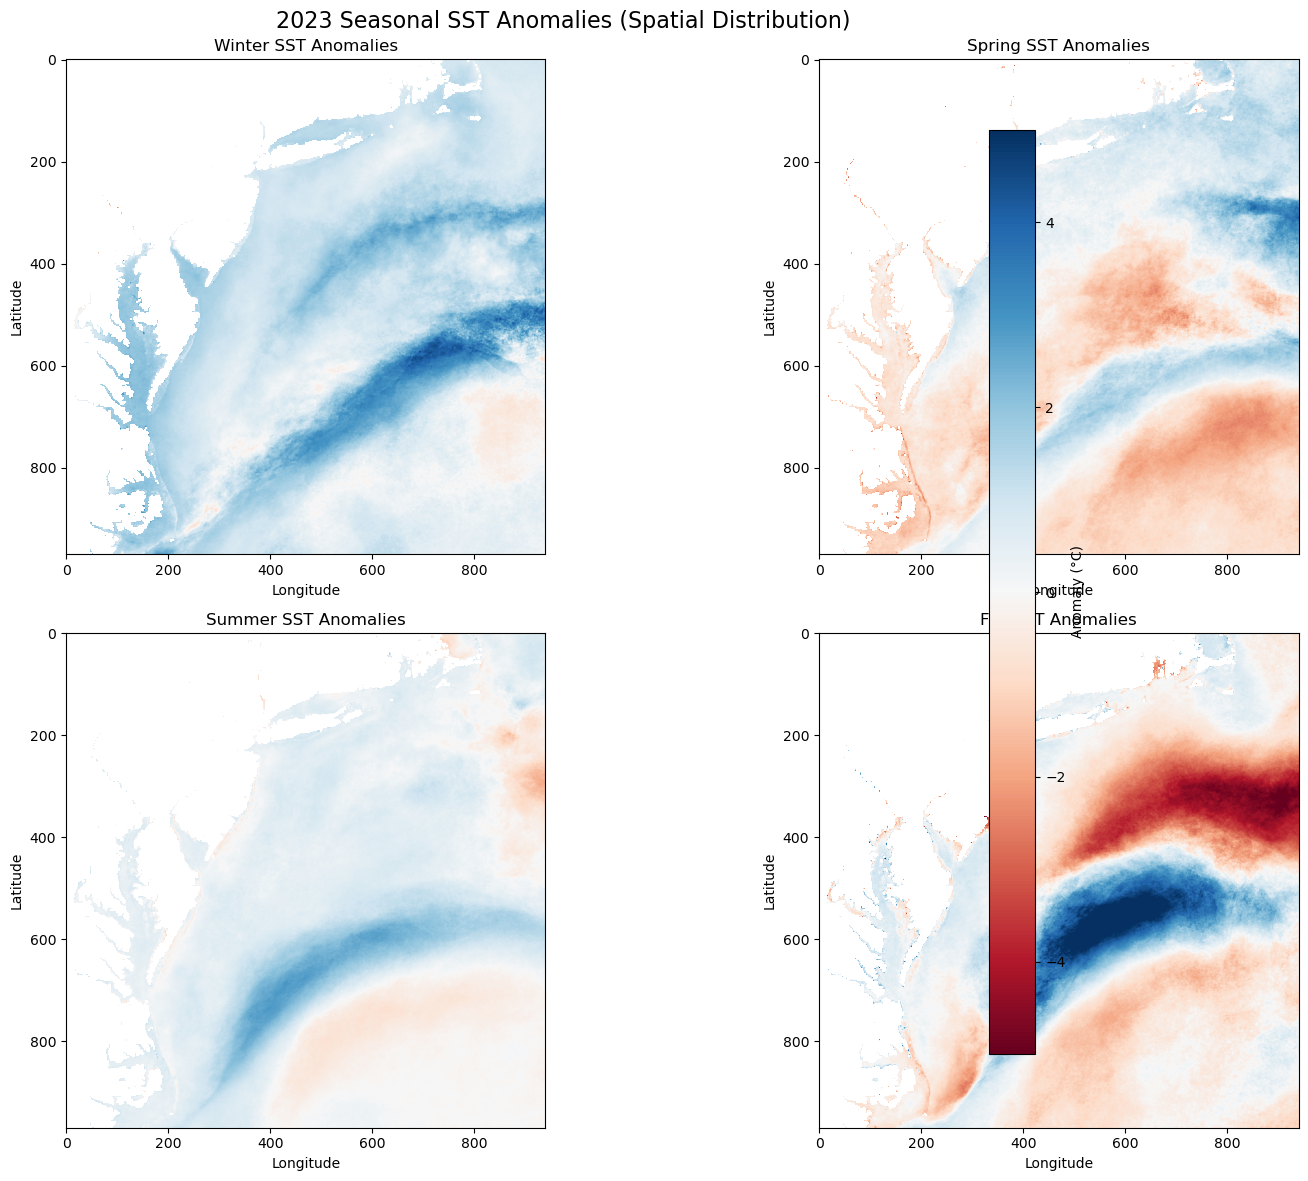

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 创建 2x2 子图

# 绘制每个季节的图
for ax, (season, anomalies) in zip(axes.ravel(), seasonal_spatial_anomalies.items()):
    anomalies = np.squeeze(anomalies)  # 确保数据为 2D
    im = ax.imshow(anomalies, cmap="RdBu", vmin=-5, vmax=5)  # 绘图
    ax.set_title(f"{season} SST Anomalies")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# 添加全局色条
fig.colorbar(im, ax=axes.ravel().tolist(), label="Anomaly (°C)")

plt.suptitle("2023 Seasonal SST Anomalies (Spatial Distribution)", fontsize=16)
plt.tight_layout()
plt.show()
